In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/all-data.csv', names = ['labels','messages'],encoding='ISO-8859-1')

In [3]:
df.isnull().sum()

labels      0
messages    0
dtype: int64

In [4]:
df_copy = df.copy()
df_copy.head()

,labels,messages
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [5]:
def func(df_new):
    if df_new == 'neutral':
        return 0
    elif df_new == 'negative':
        return 1
    else:
        return 2
df_copy['target'] = df_copy.labels.apply(func)
df_copy.head()

,labels,messages,target
0,neutral,"According to Gran , the company has no plans t...",0
1,neutral,Technopolis plans to develop in stages an area...,0
2,negative,The international electronic industry company ...,1
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2


In [6]:
# Maptplolib
import matplotlib.pyplot as plt 

# Seaborn
import seaborn as sns 

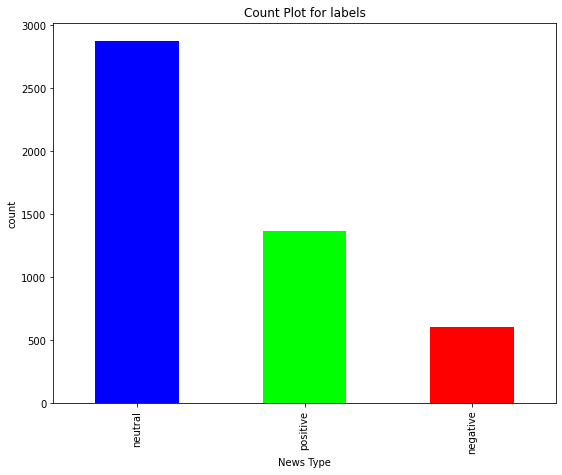

In [7]:
# Count plot for labels feature
plt.figure(figsize=(9,7))
df_copy.labels.value_counts().plot(kind='bar',color=['blue','lime','red'])
plt.xlabel("News Type")
plt.ylabel("count")
plt.title("Count Plot for labels");

In [8]:
#nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [9]:
import re

In [10]:
# Text preprocessing
corpous = list()

#Object for porterstem
ps = PorterStemmer()

for i in range(len(df_copy)):
    text = re.sub(r'[^a-zA-Z]',' ',df_copy.messages[i])
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpous.append(text)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpous).toarray()

In [12]:
# Dependent Feature
y = df_copy.target

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [14]:
cv.get_feature_names_out()

array(['ab', 'ab sto', 'abb', ..., 'york', 'zinc', 'zone'], dtype=object)

In [15]:
# Scikit-learn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Build Models

models = {
    MultinomialNB():'Multinomial Naive Bayes',
    LogisticRegression(max_iter=300):'Logistic Regression',
    SVC(C=1.0, kernel='linear', degree=3, gamma='auto'):"Support Vector Machine"
}
for m in models.keys():
    m.fit(X_train,y_train)

In [17]:
# Check Accuracy for each model
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Multinomial Naive Bayes is :  69.38144329896907 %
Accuracy Score for Logistic Regression is :  75.87628865979381 %
Accuracy Score for Support Vector Machine is :  71.75257731958763 %


### "Sentiment-Analysis" Pipeline

In [18]:
#### Pretrained pipeline applied to data:

from transformers import pipeline

In [20]:
checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'
classifier = pipeline("sentiment-analysis", checkpoint)

In [21]:
df['sentiment'] = df.messages.apply(classifier)

In [22]:
classifier(df.messages[0])

[{'label': 'NEGATIVE', 'score': 0.9906287789344788}]

In [23]:
score_ls = [df.sentiment[i][0]['score'] for i in range(len(df.sentiment))]

In [24]:
df['score'] = score_ls

In [25]:
df['pred_sentiment'] = [df.sentiment[i][0]['label'] for i in range(len(df.sentiment))]

In [26]:
df.pred_sentiment.unique()

array(['NEGATIVE', 'POSITIVE'], dtype=object)

In [27]:
df.head()

,labels,messages,sentiment,score,pred_sentiment
0,neutral,"According to Gran , the company has no plans t...","[{'label': 'NEGATIVE', 'score': 0.990628778934...",0.990629,NEGATIVE
1,neutral,Technopolis plans to develop in stages an area...,"[{'label': 'POSITIVE', 'score': 0.563786029815...",0.563786,POSITIVE
2,negative,The international electronic industry company ...,"[{'label': 'NEGATIVE', 'score': 0.967324018478...",0.967324,NEGATIVE
3,positive,With the new production plant the company woul...,"[{'label': 'POSITIVE', 'score': 0.997083485126...",0.997083,POSITIVE
4,positive,According to the company 's updated strategy f...,"[{'label': 'POSITIVE', 'score': 0.861706733703...",0.861707,POSITIVE


In [28]:
df['accurate'] = 0

In [29]:
for i, row in df.iterrows():
    accurate_val = 0
    if row.labels == row.pred_sentiment.lower():
        accurate_val = 1
    df.at[i,'accurate'] = accurate_val

In [30]:
df.head()

,labels,messages,sentiment,score,pred_sentiment,accurate
0,neutral,"According to Gran , the company has no plans t...","[{'label': 'NEGATIVE', 'score': 0.990628778934...",0.990629,NEGATIVE,0
1,neutral,Technopolis plans to develop in stages an area...,"[{'label': 'POSITIVE', 'score': 0.563786029815...",0.563786,POSITIVE,0
2,negative,The international electronic industry company ...,"[{'label': 'NEGATIVE', 'score': 0.967324018478...",0.967324,NEGATIVE,1
3,positive,With the new production plant the company woul...,"[{'label': 'POSITIVE', 'score': 0.997083485126...",0.997083,POSITIVE,1
4,positive,According to the company 's updated strategy f...,"[{'label': 'POSITIVE', 'score': 0.861706733703...",0.861707,POSITIVE,1


In [31]:
## Check how many predictions the pipeline accurately predicted the sentiment

df.accurate.value_counts()

0    3398
1    1448
Name: accurate, dtype: int64

In [32]:
df.labels.value_counts()

neutral     2879
positive    1363
negative     604
Name: labels, dtype: int64

The pipeline misidentified  3398 of 4846, however, with 2879 neutral sentiments of 4846, this is unsurprising.

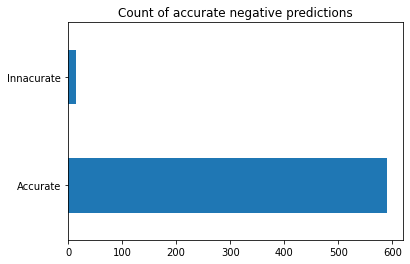

In [33]:
df[df.labels=='negative'].accurate.value_counts().plot(kind='barh')
plt.title('Count of accurate negative predictions')
plt.yticks(ticks = [1, 0], labels=['Innacurate', 'Accurate'])
plt.show()

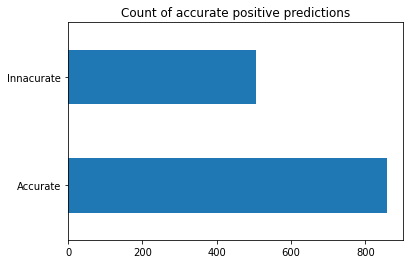

In [34]:
df[df.labels=='positive'].accurate.value_counts().plot(kind='barh')
plt.title('Count of accurate positive predictions')
plt.yticks(ticks = [1, 0], labels=['Innacurate', 'Accurate'])
plt.show()

The sentiment pipeline does a relatively decent job detecting negative sentiment, with a 97 % accuracy; on the other hand, it misses positive scores at a significantly higher rate, with a 63% accuracy. 

### Transfer Learning + Soft Max for Categorical Target

Representatives of the encoders:
    
    Albert
    Bert
    DistilBERT
    ELECTRA
    RoBERTa

In [35]:
from transformers import AutoTokenizer
from datasets import load_dataset, Dataset

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
df_copy.target.replace([1, 2], [2, 4], inplace=True)

In [ ]:
df_copy.drop('labels', axis=1, inplace=True)

In [ ]:
X = df_copy.drop("target", axis=1).values
y = df_copy.target.values

**explanation**

The data needs to be formatted so that it can be processed properly. In addition to loading the df into Dataset, we will also split train/test. Typically, data will be loaded and not generated from local memory. 

In [ ]:
dataset = Dataset.from_pandas(df_copy)

In [ ]:
dataset = dataset.train_test_split(test_size=0.2, seed=42)

In [ ]:
dataset['train']

The function below takes in a dictionary and returns a new dictionary. When using the dataset.map() function, we can retain the initial structure of the dictionary and add the input_ids as well as the attention mask as additional keys in the dictionary. This will later be used to create our tensorflow train and validation datasets after some further processing.

In [ ]:
## padding = True ensures that all vectors are the same length
## truncation = True cuts off sentences too long; since headline, not likely
## return_tensors = tf means TensorFlow tensors are returned.

def tokenize_func(datasets):
    return tokenizer(dataset['train']['messages'])
    return tokenizer(dataset['test']['messages'])

tokenized_datasets = dataset.map(tokenize_func)

In [ ]:
tokenized_datasets

In [ ]:
---

In [ ]:
tokenized_datasets['train']['input_ids'][0]

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)